## Problem Statement 

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

## Importing Libraries and Data

In [257]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
from nltk.corpus import stopwords
import pickle 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [190]:
#Let's read train and test datasets.

train  = pd.read_csv('datasets/train_E6oV3lV.csv')
test = pd.read_csv('datasets/test_tweets_anuFYb8.csv')

In [282]:
train.sample(5)

,id,label,tweet
2606,2607,1,@user most problems can be solved by talking to each other instead of about each other. #politics #relationships #newâ¦
16683,16684,0,i'm so and #grateful now that - #affirmations
18793,18794,0,"bbc news - orlando gay nightclub shooting: 50 killed, suspect is omar mateen love is love. get over it. smh"
21504,21505,0,what is a #detoxdiet? #altwaystoheal! #healthy !
30572,30573,0,thunderball - thunderdance (1994) #cd hardcore #oldschool techno #vk download here:


In [192]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


## Data PreProcessing and Cleaning

### Data Inspection 

In [193]:
# Let's check dimensions of the train and test dataset.

train.shape, test.shape

((31962, 3), (17197, 2))

Train set has 31,962 tweets and test set has 17,197 tweets.

Let's have a glimpse at label-distribution in the train dataset.

In [194]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In the train dataset, we have 2,242 tweets labeled as racist or sexist, and 29,720 tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.
Estimating approx 7% negative tweets and 93% positive tweets.

Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

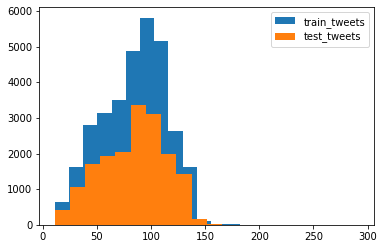

In [195]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

The tweet-length distribution is more or less the same in both train and test data.

### Data Cleaning

In [196]:
# Lets merge the test and train dataframe for clean up.

combi = train.append(test, ignore_index=True)
combi.shape

(49159, 3)

In [197]:
# remove unwanted text patterns from the tweets.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

####  Removing Twitter Handles (@user)

In [198]:
combi['clean_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


####  Removing Punctuations, Numbers, and Special Characters

In [199]:
combi['clean_tweet'] = combi['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head()

c:\users\anshu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


#### Removing Stop words

In [200]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [201]:
STOPWORDS = set(stopwords.words('english'))

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

combi['clean_tweet'] = combi['clean_tweet'].apply(lambda text: cleaning_stopwords(text))
combi.head()


,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunctional selfish drags kids dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit use cause offer wheelchair vans pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


####  Removing Short Words

In [202]:
combi['clean_tweet'] = combi['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunctional selfish drags kids dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


####  Text Normalization

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [203]:
tokenized_tweet = combi['clean_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0                      [father, dysfunctional, selfish, drags, kids, dysfunction, #run]
1    [thanks, #lyft, credit, cause, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, majesty]
3                                                            [#model, love, take, time]
4                                                    [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

**Stemming** is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

In [204]:
# Now we can normalize the tokenized tweets.

from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [205]:
# lets merge the token back together

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['clean_tweet'] = tokenized_tweet

In [206]:
combi.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunct selfish drag kid dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


## Exploratory Data Analysis (EDA)

### Understanding the Tweets data(Visualization Stage)

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

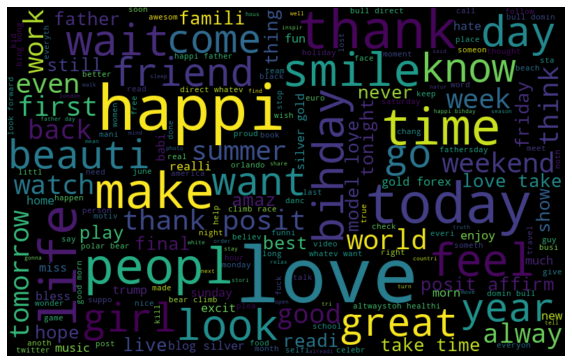

In [207]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in combi['clean_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

#### Words in non racist/sexist(positive) tweets

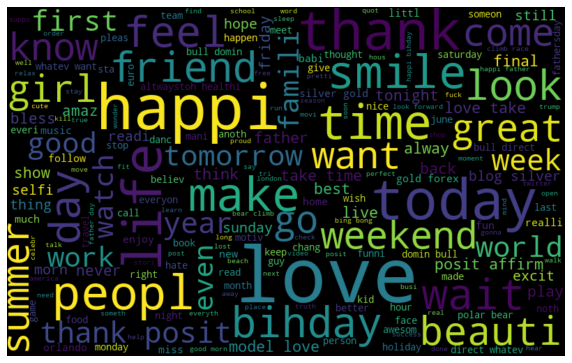

In [208]:
normal_words =' '.join([text for text in combi['clean_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Words in racist/sexist(negative) tweets

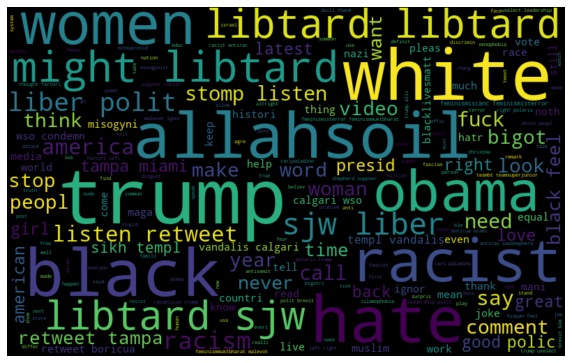

In [209]:
negative_words = ' '.join([text for text in combi['clean_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

 ### Understanding the impact of Hashtags on tweets sentiment data

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

In [210]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [211]:
# extracting hashtags from non racist/sexist tweet
HT_regular = hashtag_extract(combi['clean_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['clean_tweet'][combi['label'] == 1])

# list of negative and positive hastags
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top 'n' hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

#### Positive tweets

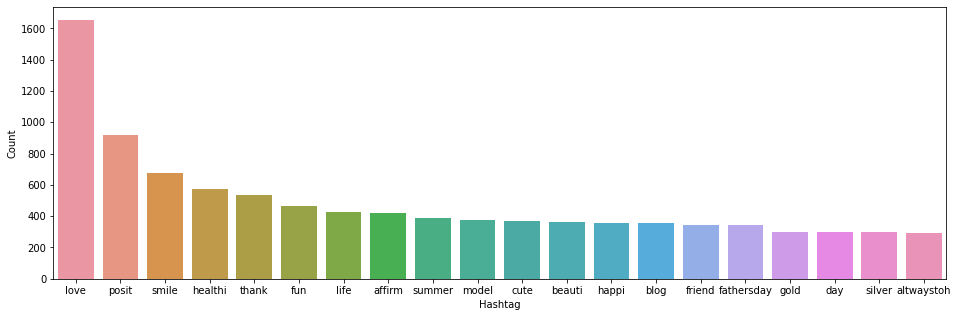

In [212]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#### Negative Tweets

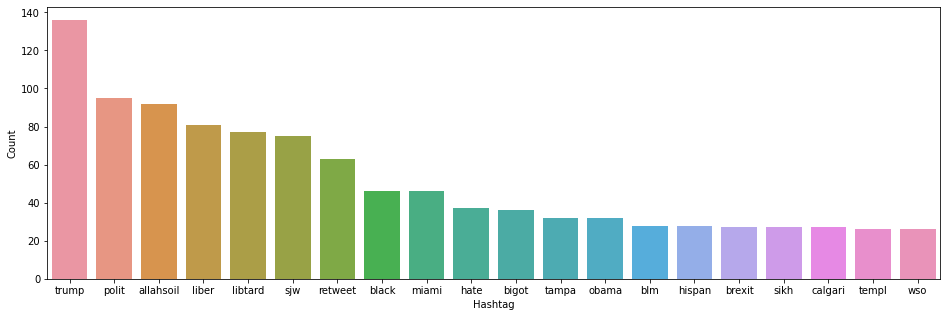

In [213]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [214]:
#### removing hastag and keeping the word
combi['clean_tweet'] = combi['clean_tweet'].str.replace("#", "")
combi.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunct selfish drag kid dysfunct run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank lyft credit caus offer wheelchair van disapoint getthank
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love take time
4,5,0.0,factsguide: society now #motivation,factsguid societi motiv


## Feature Selection and Feature Extraction 

In [215]:
from sklearn.feature_extraction.text import CountVectorizer
import gensim

### Bag-of-Words Features

Bag-of-Words is a method to represent text into numerical features. Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

Let us understand this using a simple example. Suppose we have only 2 document

D1: He is a lazy boy. She is also lazy.

D2: Smith is a lazy person.

The list created would consist of all the unique tokens in the corpus C.

= [‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]

Here, D=2, N=6

The matrix M of size 2 X 6 will be represented as –
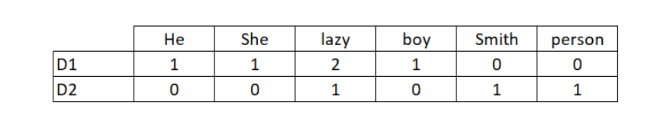



Now the columns in the above matrix can be used as features to build a classification model. Bag-of-Words features can be easily created using sklearn’s CountVectorizer function. We will set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus.

In [216]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['clean_tweet'])
bow.shape

(49159, 1000)

### Word Embedding (Word2Vec embedding)

Word2Vec is a shallow, two-layer neural networks which is trained to reconstruct linguistic contexts of words.
It takes as its input a large corpus of words and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space.
Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.


Word2Vec is a particularly computationally-efficient predictive model for learning word embeddings from raw text.


Word2Vec takes place in two way Continuous Bag-of-Words (CBOW) model and the Skip-Gram model.


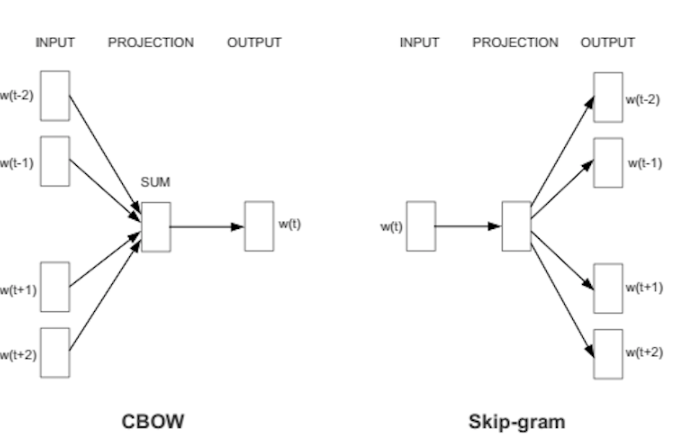


In [217]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

In [218]:
tokenized_tweet = combi['clean_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['clean_tweet']), epochs=20)

(5776754, 6601740)

In [258]:
# pickling the feature selection/extraction model 

pickle.dump(model_w2v,open("model_w2v.pkl","wb"))

Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [219]:
model_w2v.wv.most_similar(positive="smile")

[('beautifulsmil', 0.5485594868659973),
 ('invisalignjourney', 0.5485498905181885),
 ('saira', 0.5421404838562012),
 ('brownhair', 0.53214031457901),
 ('smiley', 0.5316686034202576),
 ('outfitt', 0.521308958530426),
 ('greeney', 0.511039137840271),
 ('tweegram', 0.5103821158409119),
 ('brune', 0.5099706053733826),
 ('iamwhoiam', 0.5098330974578857)]

In [220]:
model_w2v.wv.most_similar(positive="trump") 

[('donald', 0.5911769270896912),
 ('dumptrump', 0.5790315270423889),
 ('neverump', 0.5734173655509949),
 ('donthecon', 0.5526415705680847),
 ('phoni', 0.5398764610290527),
 ('melo', 0.5343707203865051),
 ('con', 0.5292959213256836),
 ('unfit', 0.5249263644218445),
 ('republican', 0.5247150659561157),
 ('curiel', 0.5241437554359436)]

In [221]:
model_w2v.wv['love']

array([ 4.57552597e-02, -2.51532435e-01, -7.91766420e-02, -1.45591646e-01,
       -2.80969501e-01,  3.32287401e-01, -2.28302449e-01, -2.36982450e-01,
       -1.87787265e-01, -1.35983497e-01, -4.02671725e-01,  3.38678002e-01,
       -2.51972497e-01, -8.71199071e-02, -8.60786811e-02,  2.73245901e-01,
        4.19332474e-01, -3.65030840e-02,  2.66121943e-02,  3.70630503e-01,
       -4.79395151e-01,  1.52407765e-01, -1.65259447e-02, -6.02150001e-02,
       -2.04173863e-01, -2.29495704e-01, -3.43574762e-01, -1.52569756e-01,
        3.04891348e-01, -1.21690616e-01, -9.07743722e-02, -1.63741767e-01,
        1.55743092e-01,  1.98301390e-01, -4.21896815e-01, -3.45280200e-01,
        3.33628833e-01, -2.27055084e-02,  3.99107039e-02, -3.25733811e-01,
       -7.75199890e-01, -2.21604094e-01, -1.82168067e-01, -1.48143947e-01,
       -5.46904206e-01, -3.56312752e-01,  2.71975577e-01, -1.48877855e-02,
       -6.97071910e-01, -2.65095025e-01, -7.29343146e-02,  4.82754840e-05,
       -4.43300158e-02,  

In [222]:
len(model_w2v.wv['love']) #The length of the vector is 200

200

#### Prepare word2vec vector array

In [223]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [224]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape 

(49159, 200)

In [267]:
tokenized_tweet[0]

['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run']

Now we have 200 new features, whereas in Bag of Words had 1000 features.

## Model Training

Till now we are all set with the pre-model building stages. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words and word2vec vectors. We will use the following algorithms to build models:

1. Logistic Regression
2. Support Vector Machine
3. RandomForest
4. XGBoost
5. Linear Support Vector Classifier

further with some other models can be trained.

##### Spliting train and test data as per BOW vector array and W2V vector array

In [225]:
from sklearn.model_selection import train_test_split

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [226]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

### 1.Logistic Regression

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,  accuracy_score

#### Bag-of-Words Features

In [228]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_lreg_bow = f1_score(yvalid, prediction_int) # calculating f1 score
f1_lreg_bow

0.5354462051709759

In [229]:
# create a submission file.

test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('submission/sub_lreg_bow.csv', index=False) # writing data to a CSV file

*AV Leaderboard F1 Score: 0.567*

#### Word2Vec Features

In [230]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_lreg_w2v = f1_score(yvalid, prediction_int)
f1_lreg_w2v

0.6083086053412463

In [231]:
# create a submission file.

test_pred = lreg.predict_proba(test_w2v)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('submission/sub_lreg_w2v.csv', index=False) # writing data to a CSV file

*AV Leaderboard F1 Score: 0.658*

### 2.Support Vector Machine

In [232]:
from sklearn import svm

#### Bag-of-Words Features

In [233]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5103189493433394

In [234]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('submission/sub_svc_bow.csv', index=False)

#### Word2Vec Features

In [235]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.606060606060606

In [236]:
test_pred = svc.predict_proba(test_w2v)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('submission/sub_svc_w2v.csv', index=False)

### 3.RandomForest

In [237]:
from sklearn.ensemble import RandomForestClassifier

#### Bag-of-Words Features

In [238]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.547049441786284

In [239]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('submission/sub_rf_bow.csv', index=False)

#### Word2Vec Features

In [240]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.5079702444208289

In [241]:
test_pred = rf.predict(test_w2v)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('submission/sub_rf_w2v.csv', index=False)

### 4.XGBoost

In [242]:
from xgboost import XGBClassifier

#### Bag-of-Words Features

In [243]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5254394079555966

In [244]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('submission/sub_xgb_bow.csv', index=False)

#### Word2Vec Features

In [245]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)

prediction = xgb_model.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6405693950177936

In [246]:
accuracy_score(yvalid, prediction)

0.9578683908645322

In [247]:
test_pred = xgb_model.predict(test_w2v)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('submission/sub_xgb_w2v.csv', index=False)

### 5. Linear Support Vector Classifier

In [248]:
from sklearn.svm import LinearSVC

#### Bag-of-Words Features

In [249]:
lsvc = LinearSVC(penalty='l2', C=0.5, dual=False, random_state=0, max_iter=1000).fit(xtrain_bow, ytrain)

prediction = lsvc.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.48538011695906447

In [250]:
test_pred = lsvc.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('submission/sub_lsvc_bow.csv', index=False)

#### Word2Vec Features

In [251]:
lsvc = LinearSVC(penalty='l2', C=0.5, dual=False, random_state=0, max_iter=1000).fit(xtrain_w2v, ytrain)

prediction = lsvc.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.5672727272727272

In [252]:
accuracy_score(yvalid, prediction)

0.950359787256231

In [253]:
test_pred = lsvc.predict(test_w2v)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('submission/sub_lsvc_w2v.csv', index=False)

## Result Observation

In [254]:
from tabulate import tabulate

data = [["Logistic Regression", 0.567, 0.658], 
        ["Support Vector Machine", 0.554, 0.647], 
        ["RandomForest", 0.598, 0.523], 
        ["XGBoost", 0.574, 0.707],
        [" Linear SVC", 0.525, 0.571]   
       ]
  
#define header names
col_names = ["Algorithms", "Bag-of-words F1 Score(AV)", "Word2Vec F1 Score(AV)"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════════╤═════════════════════════════╤═════════════════════════╕
│ Algorithms             │   Bag-of-words F1 Score(AV) │   Word2Vec F1 Score(AV) │
╞════════════════════════╪═════════════════════════════╪═════════════════════════╡
│ Logistic Regression    │                       0.567 │                   0.658 │
├────────────────────────┼─────────────────────────────┼─────────────────────────┤
│ Support Vector Machine │                       0.554 │                   0.647 │
├────────────────────────┼─────────────────────────────┼─────────────────────────┤
│ RandomForest           │                       0.598 │                   0.523 │
├────────────────────────┼─────────────────────────────┼─────────────────────────┤
│ XGBoost                │                       0.574 │                   0.707 │
├────────────────────────┼─────────────────────────────┼─────────────────────────┤
│ Linear SVC             │                       0.525 │                   0.571 │
╘═══

In [255]:
## Sample testing

In [256]:
import pickle 

pickle.dump(xgb_model, open('dump.pkl','wb'))